In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree

import SweetSpotPrediction as ssp

# 03 Exploration of models
Try out a few models see which one works
*Note: Run 01 to build the .csv files needed*

In [2]:
df = pd.read_csv('RegressionData.csv')

In [3]:
features = [
    #'XPos', # propbably dont want these as features
    #'YPos', # propbably dont want these as features
    'Thickness',
    'AvgNTG',
    'AvgPerm',
    'AvgPoro',
    'NetPerm',

]

label_reg = 'WellProbability'
df.head()

,Unnamed: 0,XPos,YPos,Thickness,AvgNTG,AvgPerm,AvgPoro,NetPerm,WellProbability
0,0,452000.0,6780600.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,452000.0,6780650.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2,452000.0,6780700.0,NaN,NaN,NaN,NaN,NaN,NaN
3,3,452000.0,6780750.0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,452000.0,6780800.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.dropna(inplace=True)

# somre more tweaking

In [5]:
#df[label_reg] = df[label_reg] * df[label_reg]

# scale from 0 to 1
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#df[label_reg] = scaler.fit_transform(df[[label_reg]])

In [6]:
X_train, X_, y_train, y_ = train_test_split(df[features], df[label_reg].values, test_size=0.33, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size=0.50, random_state=42)
y_train

array([0.11296081, 0.172832  , 0.12385109, ..., 0.06960437, 0.0317261 ,
       0.05867141])

# Normalization and other preprocessing

In [7]:
preprocessing = StandardScaler()
X_train = preprocessing.fit_transform(X_train)
X_test = preprocessing.transform(X_test)
X_val = preprocessing.transform(X_val)
X_train[:5]

array([[ 1.65014232,  0.18231105, -0.16373121,  0.7286982 ,  0.3948424 ],
       [ 1.04073621, -0.32438038, -0.1754074 ,  0.31141331,  2.7195599 ],
       [-0.22082252, -0.02677682, -0.37602856, -0.93338002, -0.05879958],
       [ 0.04493207, -1.23242817,  1.86304624,  0.09908652, -0.96789496],
       [ 0.4751954 , -0.98980224,  0.27746817,  0.04990199,  0.9685945 ]])

# lets draw what we are trying to predict

In [8]:
from sklearn import linear_model
from sklearn import svm
from sklearn.metrics import r2_score

regressors = [
    svm.SVR(),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    #linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()
]

In [9]:
for index, reg in enumerate(regressors):
    print(f"Model {index}: {reg}")
    reg.fit(X_train, y_train)
    y_pred_val = reg.predict(X_val)
    
    score = r2_score(y_val, y_pred_val, multioutput='variance_weighted') 
    print(f"Accuracy: {score:.2f}")

    print(f"-------------------------------------------------------------------")

Model 0: SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)
Accuracy: 0.20
-------------------------------------------------------------------
Model 1: SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)
Accuracy: 0.07
-------------------------------------------------------------------
Model 2: BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)
Accuracy: 0.08
------------------------------------------------------

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Accuracy: 0.02
-------------------------------------------------------------------
Model 6: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
Accuracy: 0.08
-------------------------------------------------------------------


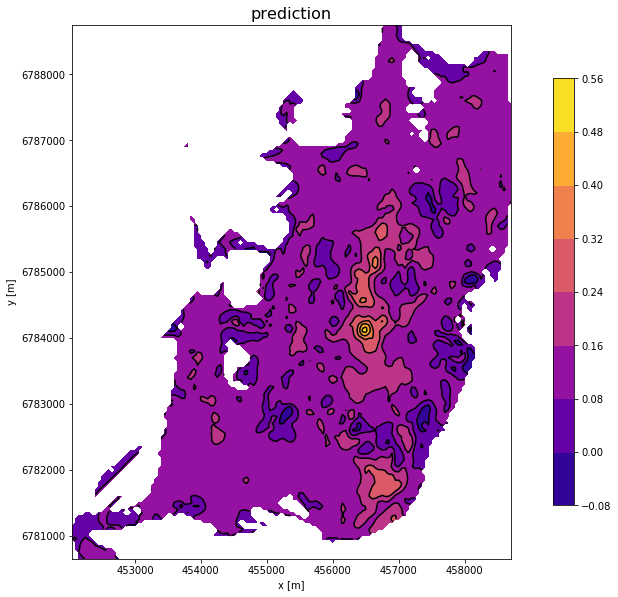

In [10]:
bestModel = regressors[0]

df['prediction'] = bestModel.predict(preprocessing.transform(df[features]))
ssp.plot_map(df, 'prediction')

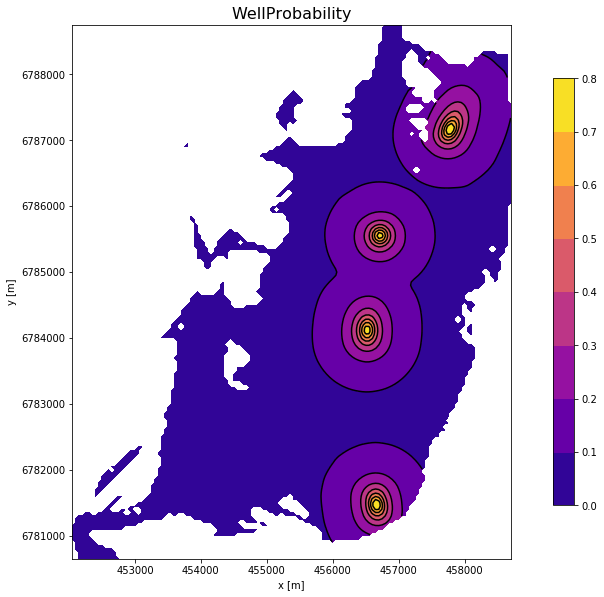

In [11]:
ssp.plot_map(df, label_reg)

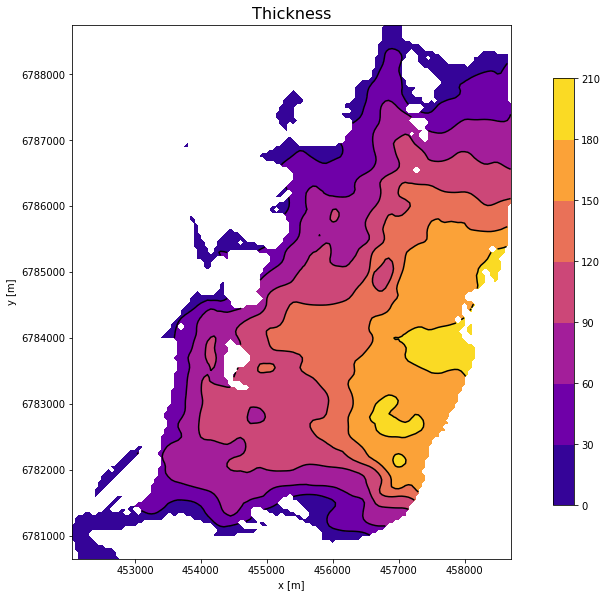

In [12]:
ssp.plot_map(df, 'Thickness')

# <a href="02 Base Model.ipynb">Previous</a> <a href="04 Classification model.ipynb">Next</a> Notebook